In [11]:
# Import các thư viện
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [12]:
# STEP 1: Đọc dữ liệu
print("Đọc dữ liệu từ các tệp CSV...")
train_data_path = '../dataset/train.csv'  # Đường dẫn đến train.csv
test_data_path = '../dataset/test.csv'    # Đường dẫn đến test.csv
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

Đọc dữ liệu từ các tệp CSV...


In [13]:
# Hiển thị thông tin ban đầu
print("\n10 dòng đầu của tập train:")
display(train_data.head(10))

print("\n10 dòng đầu của tập test:")
display(test_data.head(10))


10 dòng đầu của tập train:


,ID,flow_duration,Header_Length,Protocol type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label
0,769866,0.000000,54.00,6.00,64.00,2.890680,2.890680,0.0,0.0,0.0,...,NaN,54.00,8.294698e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
1,1859874,0.000892,54.58,NaN,64.00,28.594443,28.594443,0.0,0.0,1.0,...,0.000000,54.00,8.297298e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
2,396092,0.000000,0.00,1.00,64.00,23.716061,23.716061,0.0,0.0,0.0,...,NaN,NaN,8.312478e+07,9.5,9.165151,0.000000,NaN,0.00,141.55,DDoS-ICMP_Flood
3,179708,109.146727,1992.80,8.20,50.10,41.102103,41.102103,0.0,0.0,0.0,...,305.527954,223.00,NaN,13.5,19.438032,433.145956,98347.063168,1.00,244.60,Recon-PortScan
4,1527289,0.025221,58.53,5.95,65.91,25.300629,25.300629,NaN,1.0,0.0,...,1.158718,56.76,8.334493e+07,9.5,10.420536,1.657137,61.278209,0.04,141.55,DDoS-RSTFINFlood
5,1626915,1.727369,74.52,6.00,64.00,0.440003,0.440003,0.0,0.0,1.0,...,0.000000,54.00,8.336213e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
6,1340627,0.309024,204.00,16.89,64.00,4.249147,4.249147,0.0,0.0,0.0,...,8.640997,111.31,8.300770e+07,9.5,13.917841,12.235215,577.341991,0.13,141.55,DoS-UDP_Flood
7,546001,0.616049,108.00,6.00,64.00,3.301385,3.301385,0.0,0.0,1.0,...,0.000000,54.00,8.336548e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
8,1374661,4.747486,21238.10,6.44,70.90,33576.748008,33576.748008,0.0,0.0,0.0,...,794.936637,1251.39,8.299881e+07,9.5,45.745708,1125.300456,755730.914744,0.95,141.55,DoS-HTTP_Flood
9,2655817,0.000000,54.00,6.00,64.00,20.966540,20.966540,0.0,1.0,0.0,...,0.000000,54.00,8.334475e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood



10 dòng đầu của tập test:


,ID,flow_duration,Header_Length,Protocol type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,557973,5.512903,7551111.00,6.00,50.00,1071.939766,1071.939766,0.0,0.0,0.0,...,1320.323802,489.873763,1514.00,1.676389e+08,13.5,NaN,694.197492,2.424091e+05,1.00,244.60
1,341704,0.000000,741.86,5.88,62.72,0.485594,0.485594,0.0,NaN,0.0,...,918.596271,545.057732,926.32,8.333613e+07,9.5,42.701969,770.726968,3.129036e+05,0.95,141.55
2,2050100,223.220984,8405.20,9.30,175.20,3.722975,3.722975,0.0,0.0,0.0,...,131.960660,92.642629,NaN,1.676388e+08,13.5,16.267696,NaN,8.612926e+03,1.00,NaN
3,1515342,41.144953,2183780.60,17.00,51.30,95.883044,95.883044,NaN,NaN,NaN,...,465.310675,163.896434,459.70,1.722813e-04,5.5,NaN,231.784560,4.170580e+04,0.90,38.50
4,2565329,NaN,1150033.90,6.00,63.60,69.455512,69.455512,0.0,0.0,0.0,...,2807.201905,1197.260005,NaN,1.290417e-03,5.5,74.596326,1693.181337,1.600649e+06,0.90,NaN
5,1925217,0.046695,57.67,46.70,64.00,1.754951,1.754951,0.0,0.0,0.0,...,590.301321,6.311840,589.46,8.367745e+07,9.5,34.359365,8.945515,4.030556e+02,0.10,141.55
6,1909686,NaN,871.93,7.09,76.79,12.010158,12.010158,0.0,0.0,0.0,...,813.251619,516.028159,808.35,8.333663e+07,9.5,39.670747,729.814460,2.911491e+05,NaN,141.55
7,547331,0.000000,81.00,6.00,64.00,6.024178,6.024178,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.292579e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55
8,1838597,0.001225,2.22,1.05,65.67,23.189107,23.189107,NaN,0.0,0.0,...,996.388806,NaN,935.12,8.325005e+07,9.5,44.581965,771.145375,3.130638e+05,0.95,141.55
9,545990,0.000000,NaN,6.00,64.00,23.264208,23.264208,NaN,1.0,0.0,...,54.000000,0.000000,54.00,8.334422e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55


In [14]:
# STEP 2: Xử lý dữ liệu
def preprocess_data(data, has_label=True):
    """
    Xử lý dữ liệu bao gồm:
    - Xử lý giá trị âm.
    - Thay thế NaN, inf, -inf.
    """
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    # Xử lý giá trị âm
    min_value = data[numeric_columns].min().min()
    if min_value < 0:
        print(f"Phát hiện giá trị âm: {min_value}. Đang xử lý...")
        data[numeric_columns] += abs(min_value) + 1  # Dịch chuyển dữ liệu lên không âm

    # Thay thế NaN, inf, -inf
    if has_label and 'Label' in data.columns:
        for col in numeric_columns:
            data[col] = data.groupby('Label')[col].transform(lambda x: x.replace([np.inf, -np.inf, np.nan], 0 if x.isnull().all() else x.mean()))
    else:
        data = data.replace([np.inf, -np.inf, np.nan], 0)  # Với tập test, thay thế trực tiếp bằng 0

    return data

train_data = preprocess_data(train_data, has_label=True)
test_data = preprocess_data(test_data, has_label=False)

In [15]:
# STEP 3: Chuẩn bị dữ liệu
label_encoder = LabelEncoder()
train_data['Original_Label'] = train_data['Label']
train_data['Label'] = label_encoder.fit_transform(train_data['Label'])
# Lưu LabelEncoder vào file
label_encoder_path = '../model/label_encoder.pkl'
with open(label_encoder_path, 'wb') as f:
    pickle.dump(label_encoder, f)
print(f"LabelEncoder đã được lưu tại: {label_encoder_path}")

LabelEncoder đã được lưu tại: ../model/label_encoder.pkl


In [16]:


X_train_full = train_data.drop(columns=['Label'])
y_train_full = train_data['Label']
X_test = test_data.copy()

X_train_full = pd.get_dummies(X_train_full)
X_test = pd.get_dummies(X_test)
X_train_full, X_test = X_train_full.align(X_test, join='left', axis=1, fill_value=0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Chia dữ liệu thành train và validation (70-30)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, val_index in sss.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

In [17]:
# STEP 4: Huấn luyện mô hình
print("\nHuấn luyện mô hình Random Forest...")
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


Huấn luyện mô hình Random Forest...


RandomForestClassifier(n_jobs=-1, random_state=42)

In [18]:
# Lưu mô hình
model_save_path = '../model/random_forest_model.pkl'
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)
print(f"Mô hình đã được lưu tại {model_save_path}")

Mô hình đã được lưu tại ../model/random_forest_model.pkl


In [19]:
# Validation evaluation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)

print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))





Validation Accuracy: 0.9999982907210081
Precision: 0.9999982913391922
Recall: 0.9999982907210081
F1 Score: 0.99999829000261

Classification Report for Validation Set:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      1.00      1.00       676
          BenignTraffic       1.00      1.00      1.00     25226
       BrowserHijacking       1.00      1.00      1.00      1240
       CommandInjection       1.00      1.00      1.00      1146
 DDoS-ACK_Fragmentation       1.00      1.00      1.00     25205
        DDoS-HTTP_Flood       1.00      1.00      1.00      6101
        DDoS-ICMP_Flood       1.00      1.00      1.00     25076
DDoS-ICMP_Fragmentation       1.00      1.00      1.00     25236
      DDoS-PSHACK_Flood       1.00      1.00      1.00     25214
       DDoS-RSTFINFlood       1.00      1.00      1.00     25185
         DDoS-SYN_Flood       1.00      1.00      1.00     25215
         DDoS-SlowLoris       1.00      1.00      1

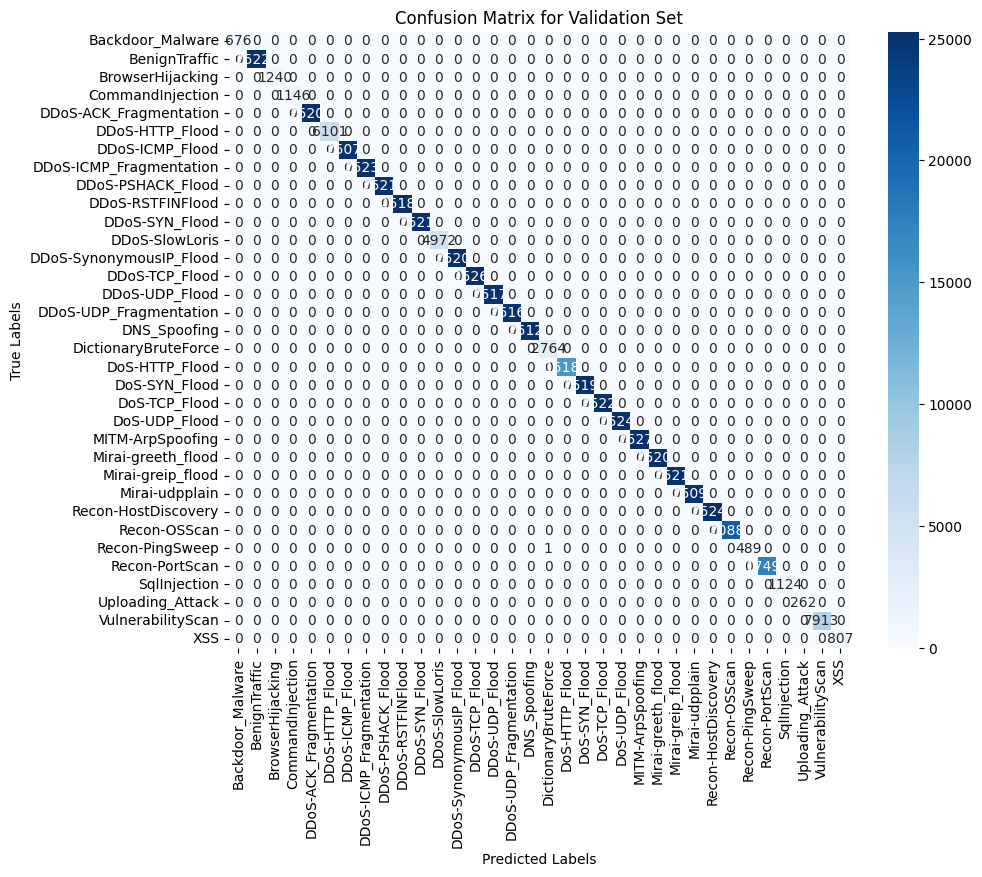

In [20]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
# Đánh giá cross-validation
print("\nĐánh giá cross-validation...")
cv_scores = cross_val_score(model, X_train_full, y_train_full, cv=5, scoring='accuracy')
print(f"\nĐộ chính xác trung bình: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Đánh giá cross-validation...

Độ chính xác trung bình: 1.0000 (+/- 0.0000)


In [22]:
# Dự đoán trên tập test
y_test_pred = model.predict(X_test)
test_data['Predicted_Label'] = label_encoder.inverse_transform(y_test_pred)

# Lưu kết quả
output_test_path = '../result/test_predictions.csv'
test_data.to_csv(output_test_path, index=False)
print(f"\nKết quả dự đoán đã được lưu tại {output_test_path}")


Kết quả dự đoán đã được lưu tại ../result/test_predictions.csv
